In [5]:
# analysis/visualize_training.ipynb
# --- Imports ---
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load CSV from artifacts/stats/ ---
logs_dir = Path("../artifacts/logs")
csv_files = sorted(logs_dir.glob("*.csv"))

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {logs_dir.resolve()}")

# Load the newest CSV by default
csv_path = csv_files[-1]
print("Loaded:", csv_path)

df = pd.read_csv(csv_path)
df.head()


Loaded: ..\artifacts\logs\train_stats.csv


,episode,total_reward,episode_length,loss
0,10,-11.475073,12,0.038147
1,20,-12.796196,12,-0.037397
2,30,-12.186052,51,-0.012733
3,40,-11.622873,64,-0.028337
4,50,-10.113630,51,-0.038456


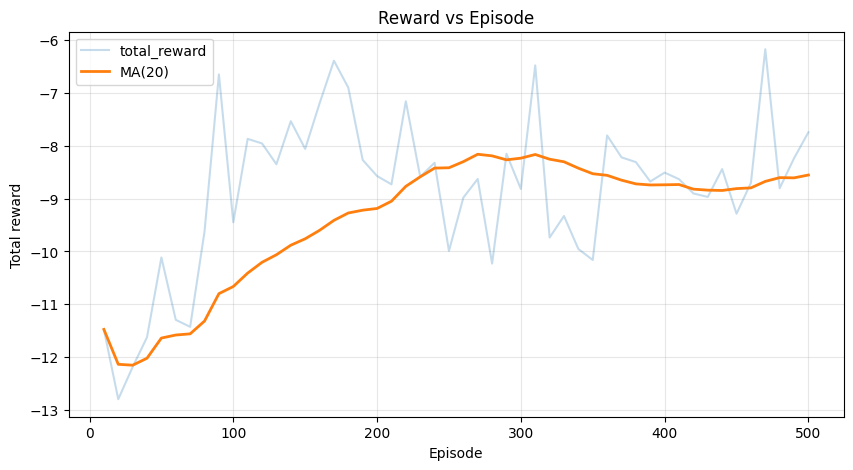

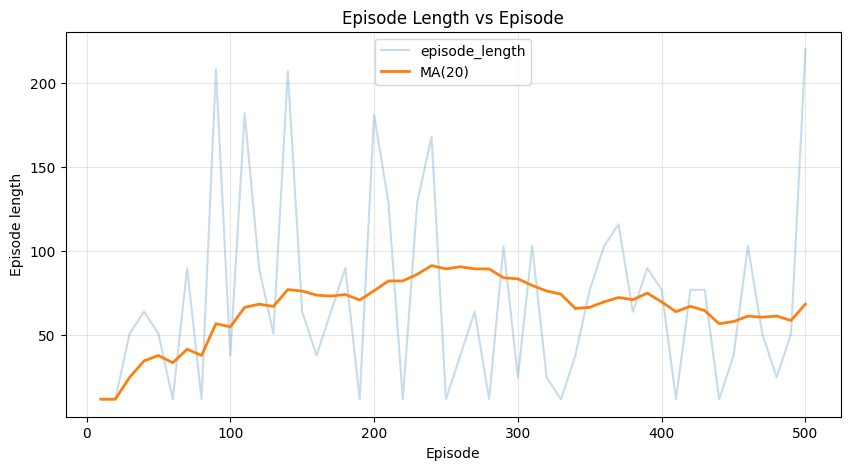

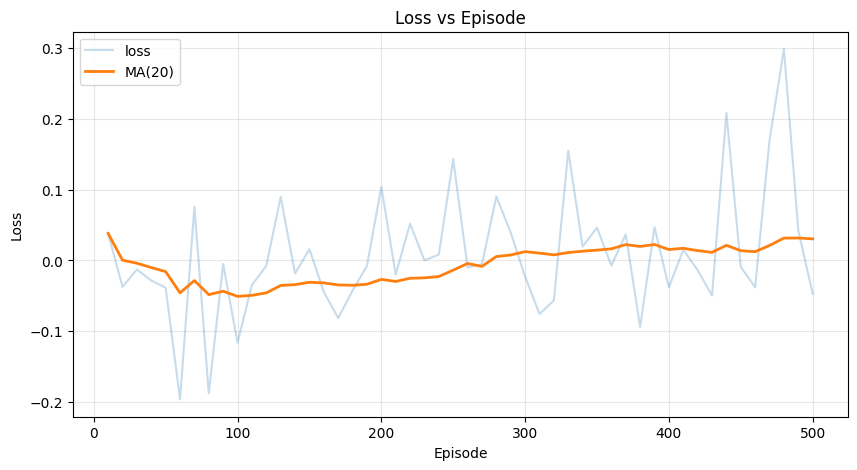

In [6]:
# 2) Reward vs episode (with moving average)
window = 20
df["reward_ma"] = df["total_reward"].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df["episode"], df["total_reward"], alpha=0.25, label="total_reward")
plt.plot(df["episode"], df["reward_ma"], linewidth=2, label=f"MA({window})")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("Reward vs Episode")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 3) Episode length vs episode (with moving average)
df["len_ma"] = df["episode_length"].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df["episode"], df["episode_length"], alpha=0.25, label="episode_length")
plt.plot(df["episode"], df["len_ma"], linewidth=2, label=f"MA({window})")
plt.xlabel("Episode")
plt.ylabel("Episode length")
plt.title("Episode Length vs Episode")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 4) Loss vs episode (with moving average)
df["loss_ma"] = df["loss"].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df["episode"], df["loss"], alpha=0.25, label="loss")
plt.plot(df["episode"], df["loss_ma"], linewidth=2, label=f"MA({window})")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.title("Loss vs Episode")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()